In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
na = np.newaxis

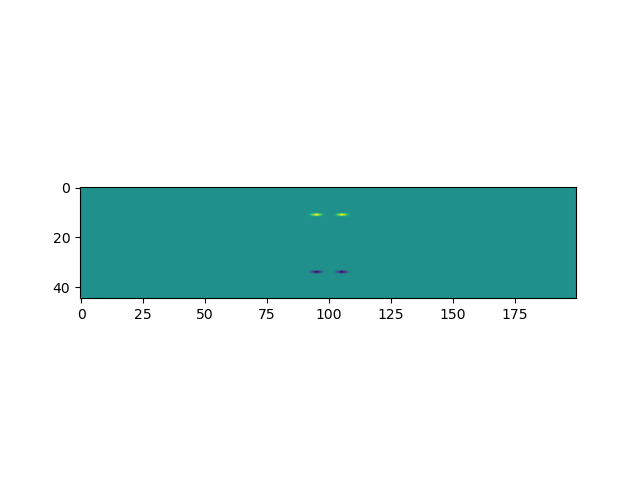

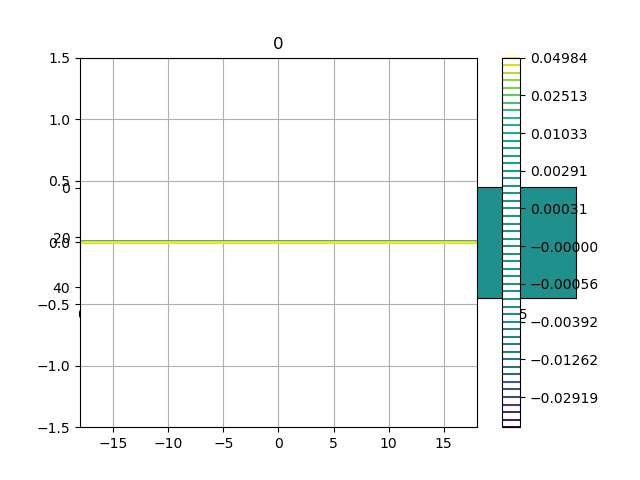

Begin? 


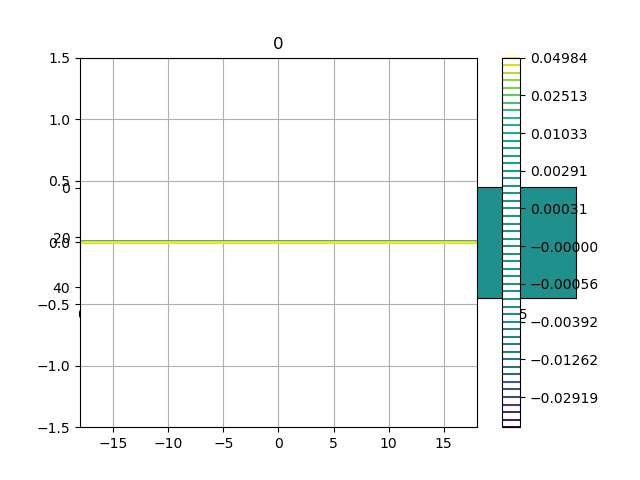

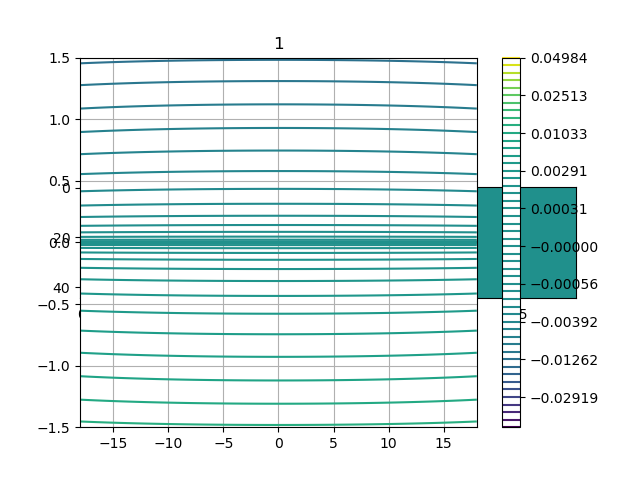

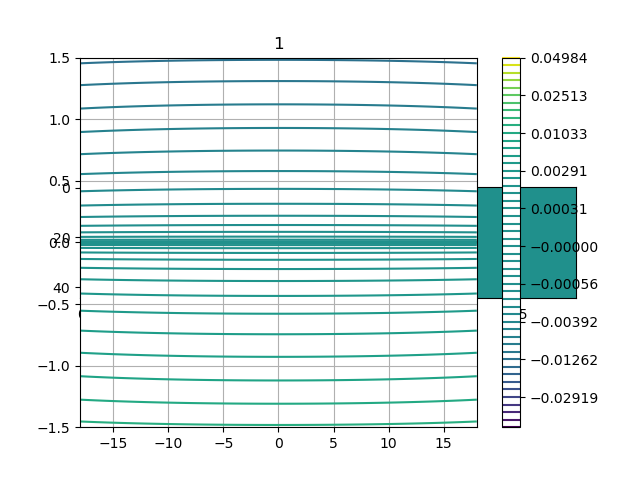

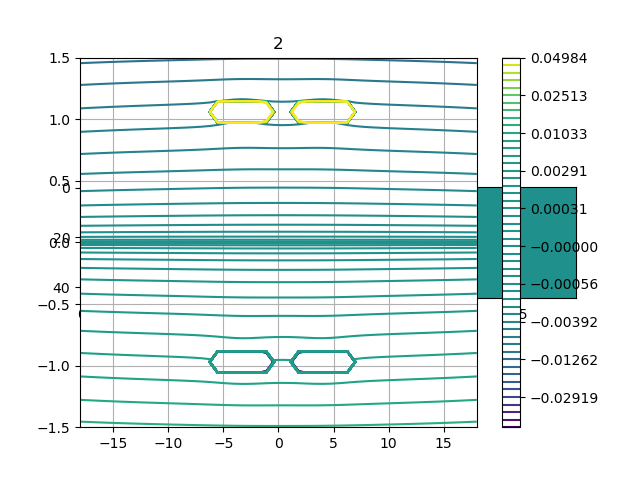

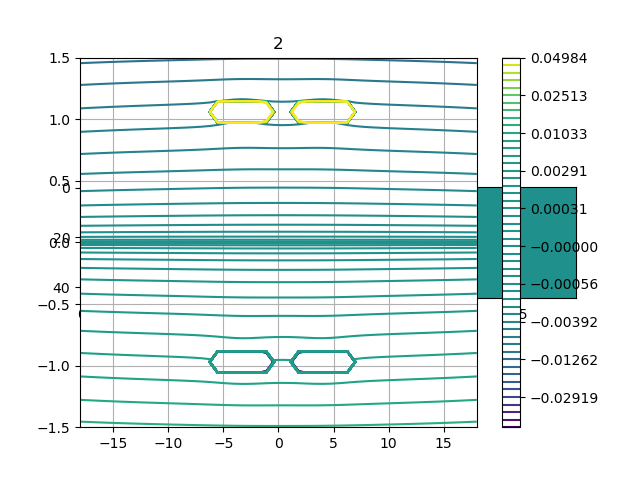

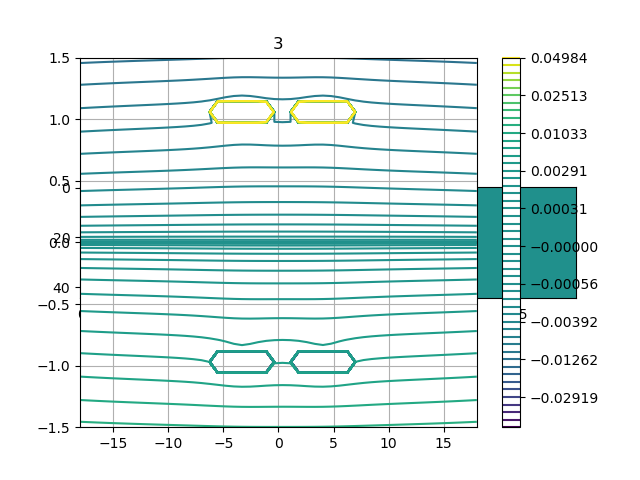

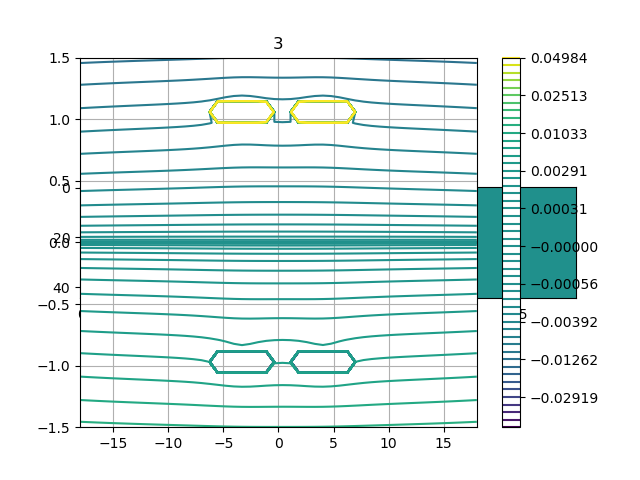

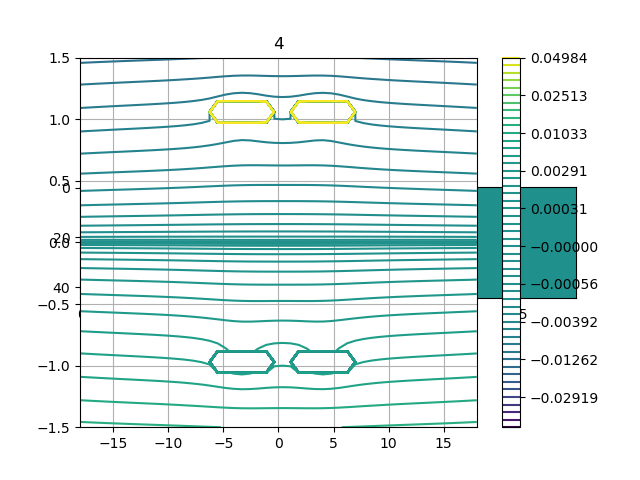

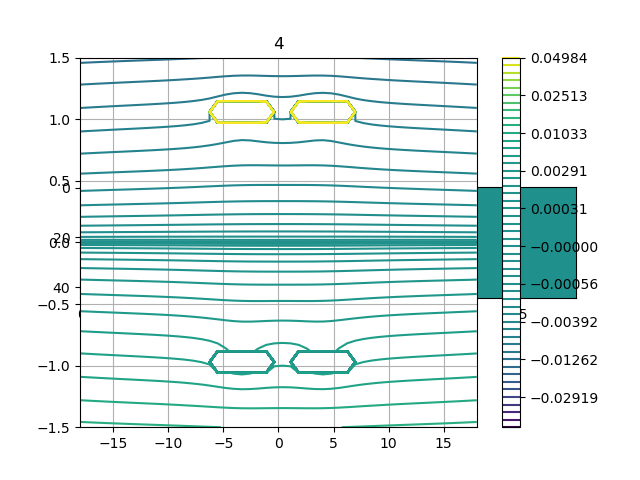

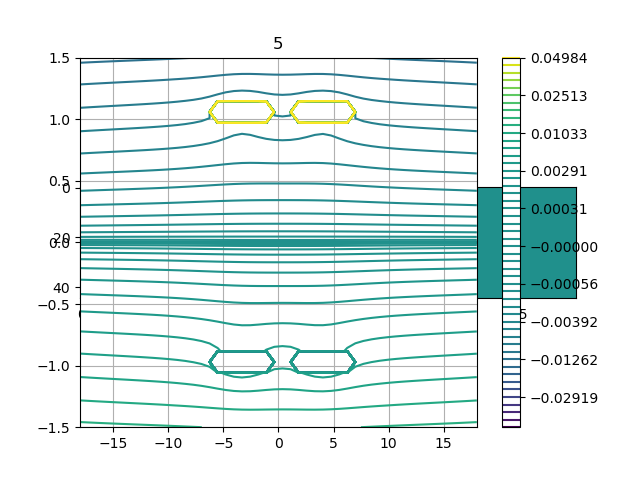

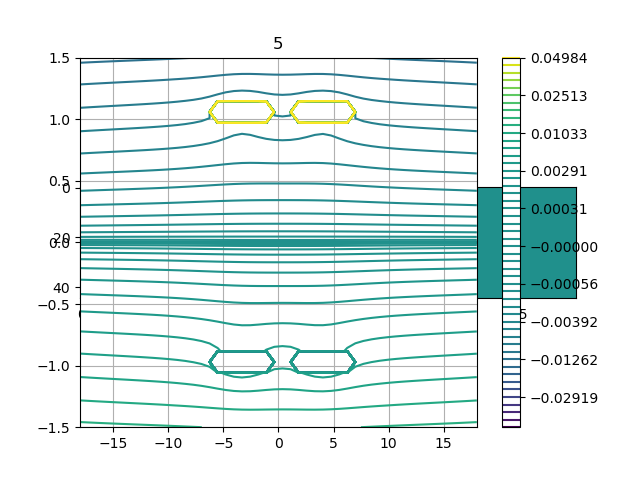

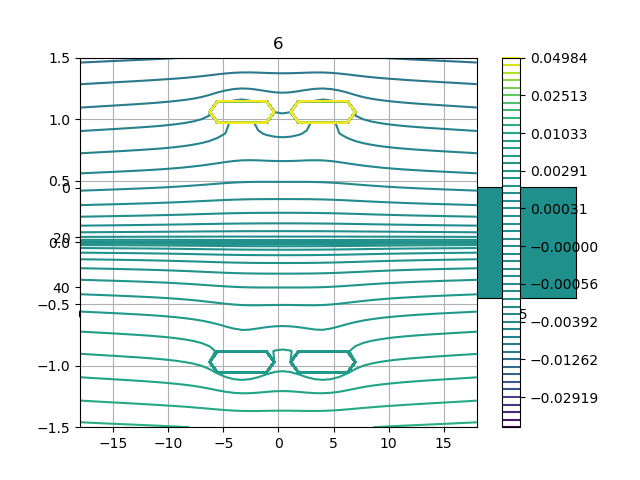

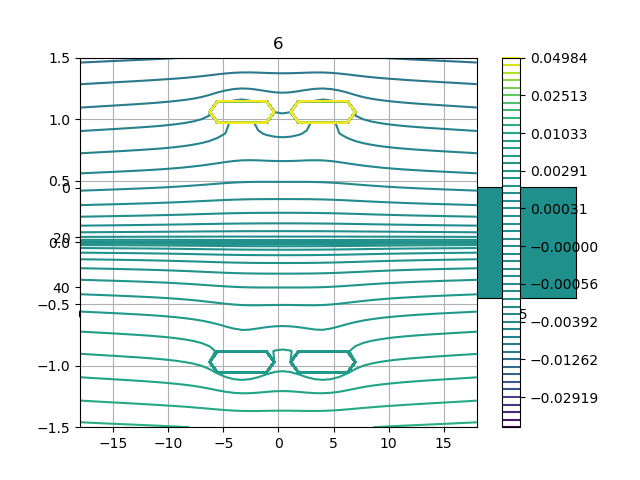

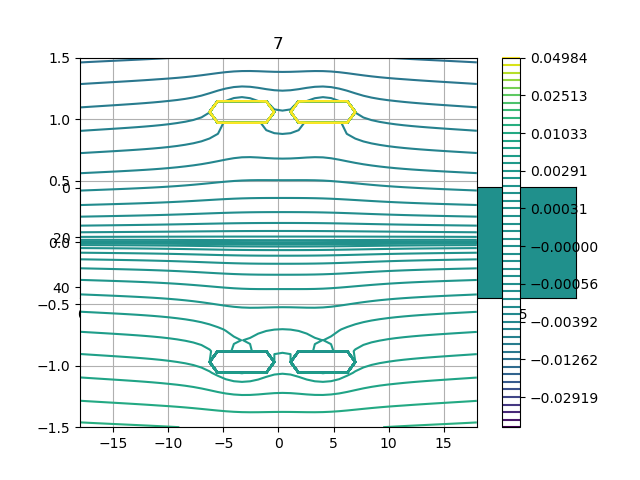

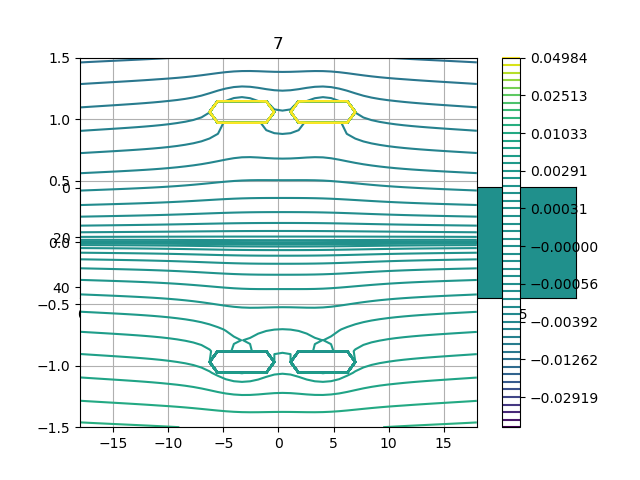

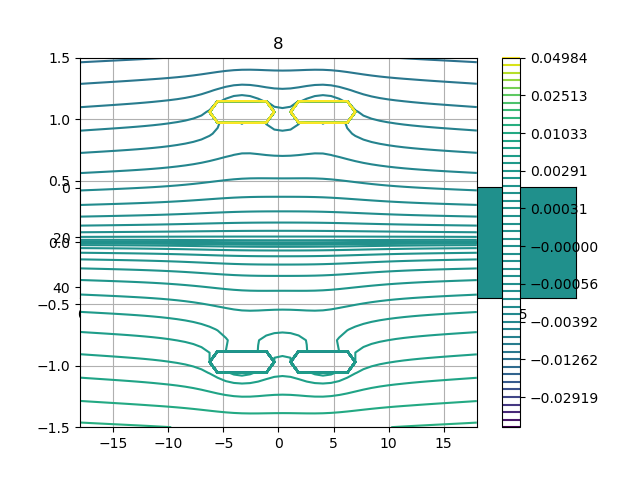

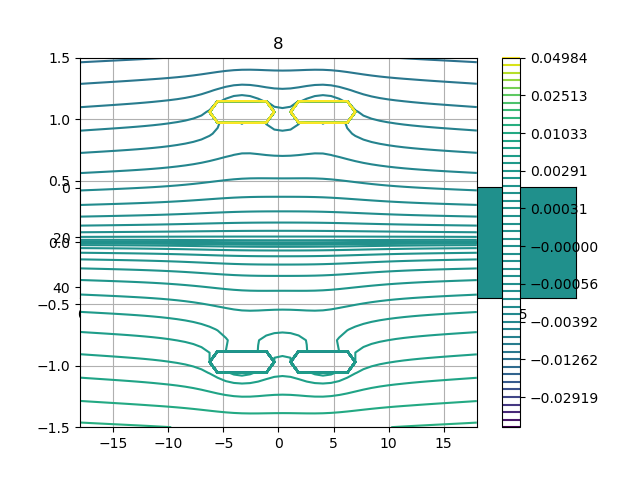

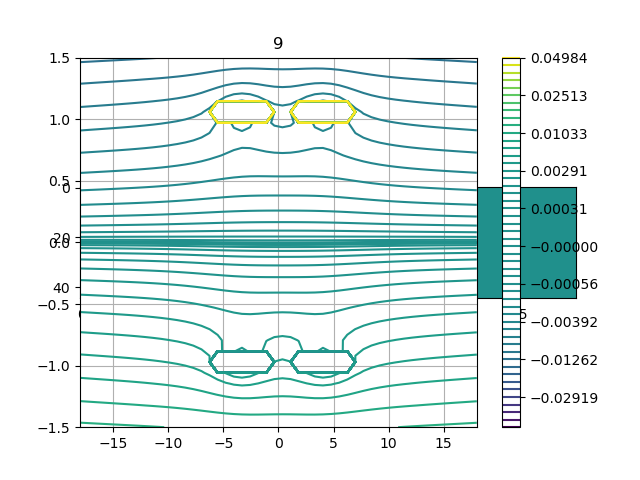

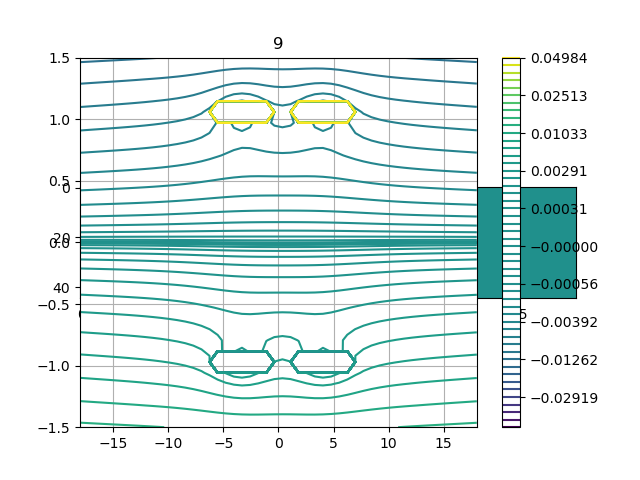

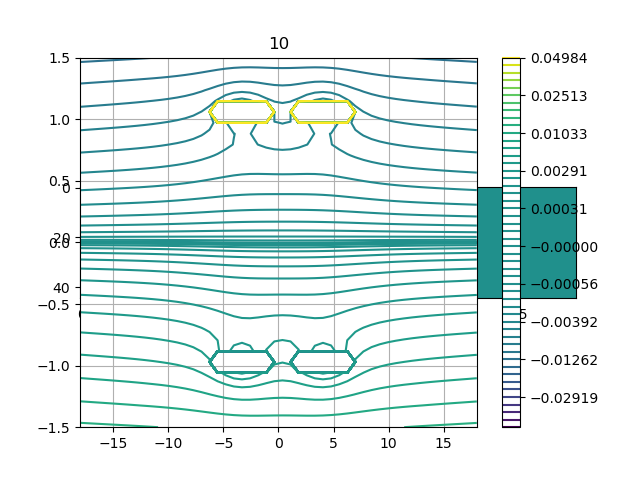

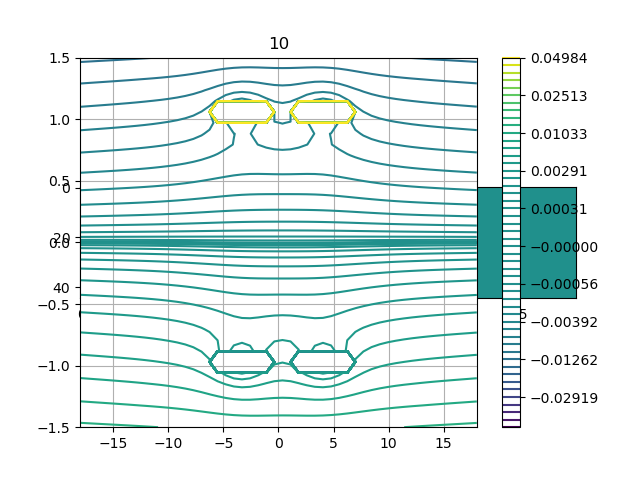

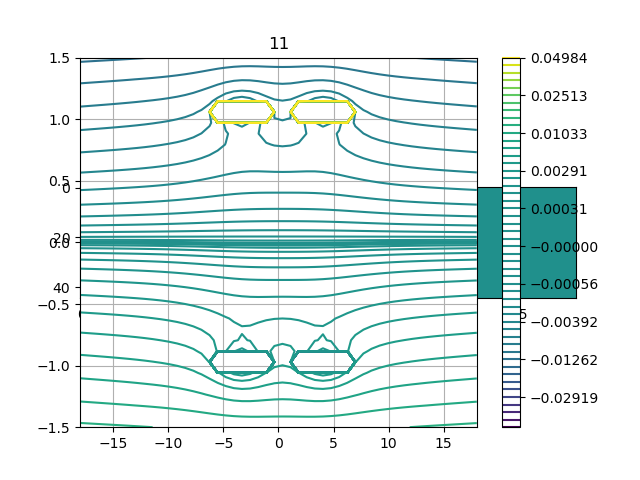

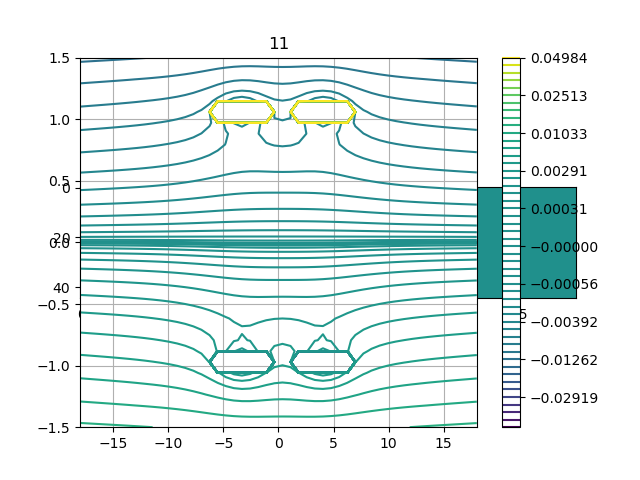

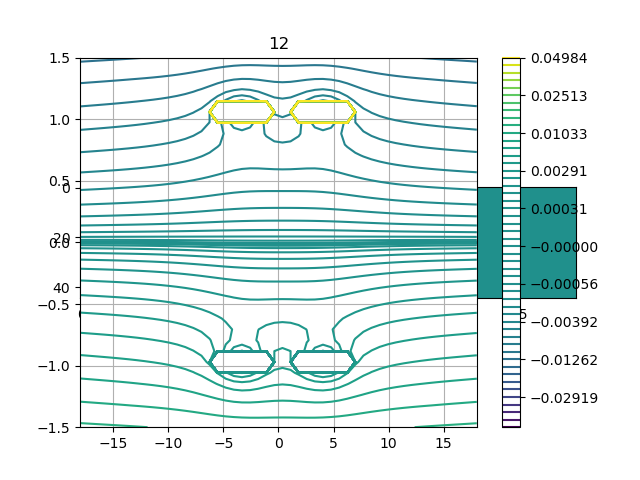

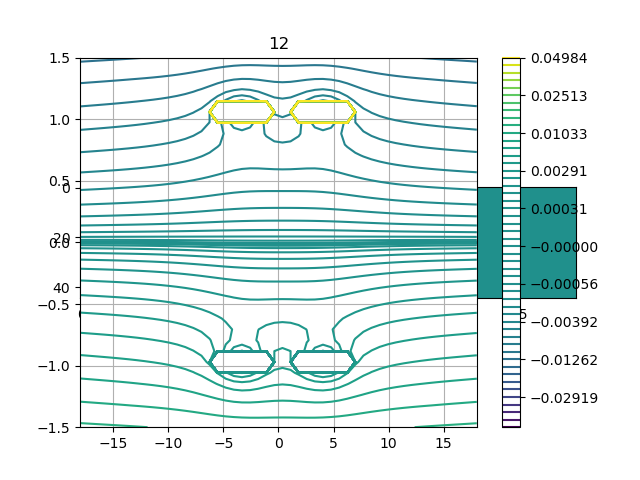

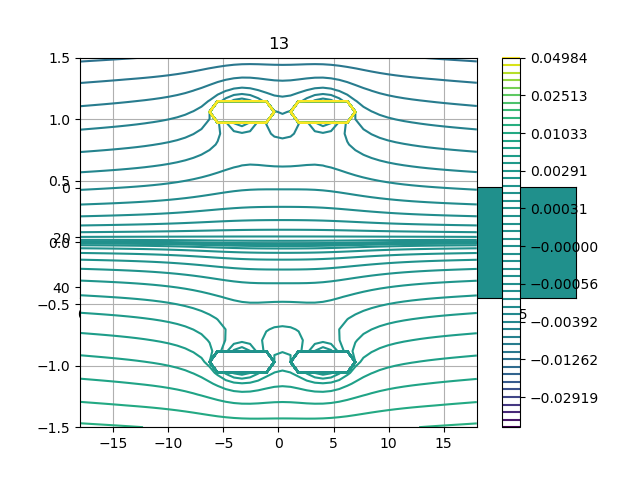

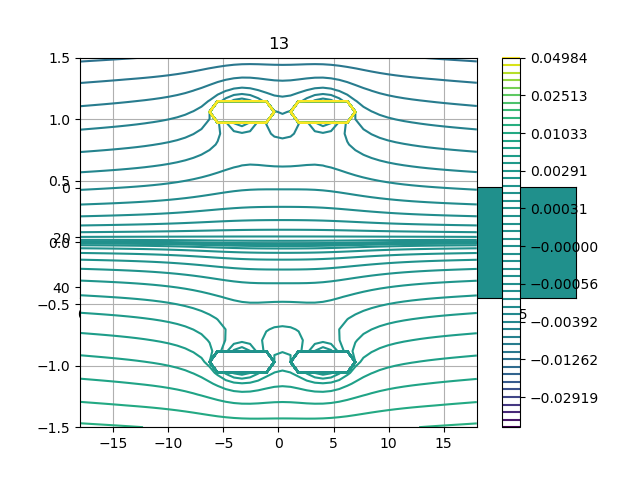

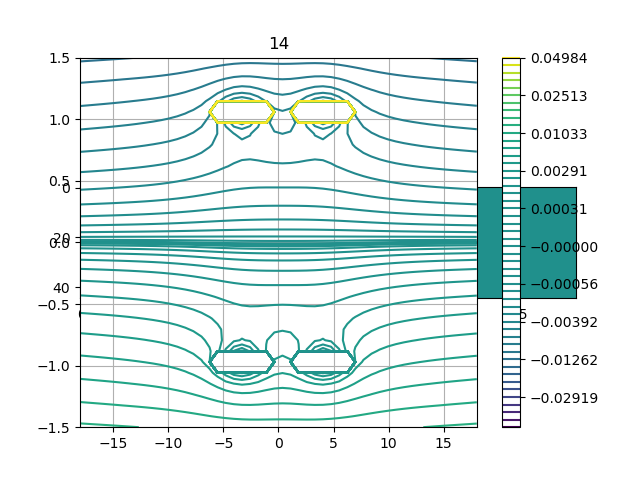

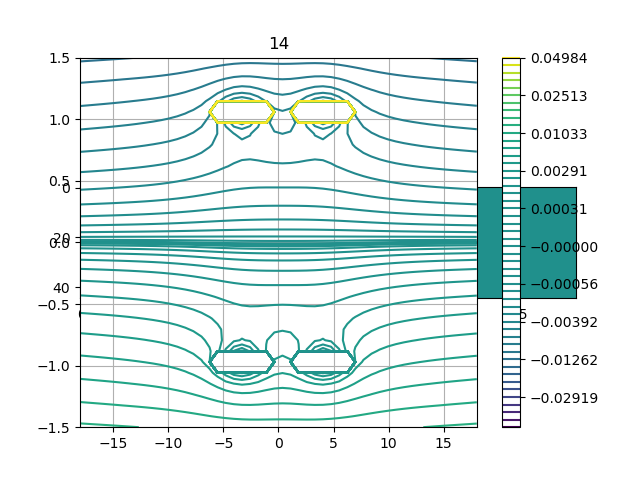

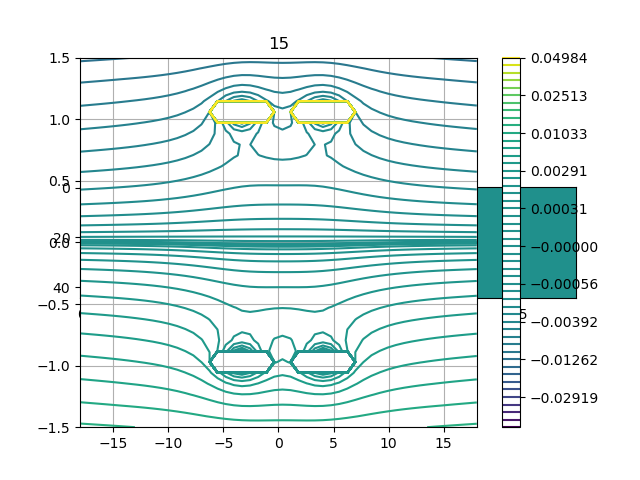

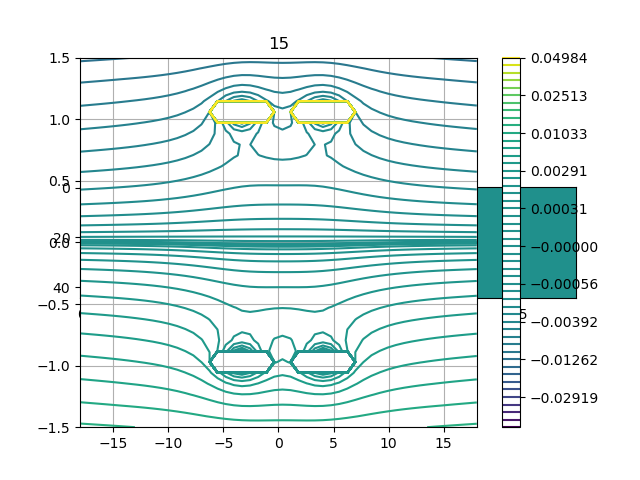

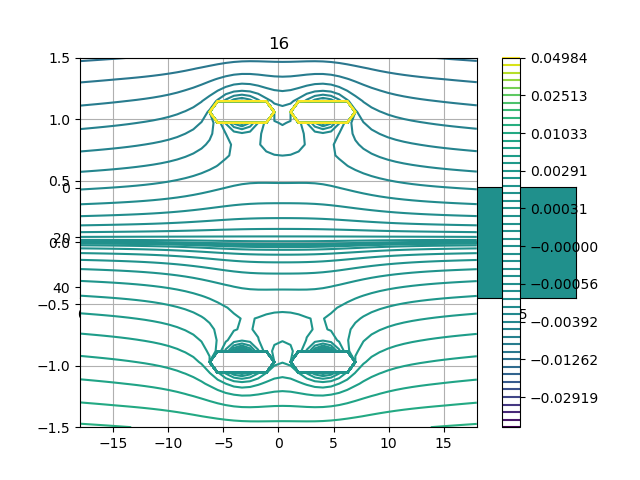

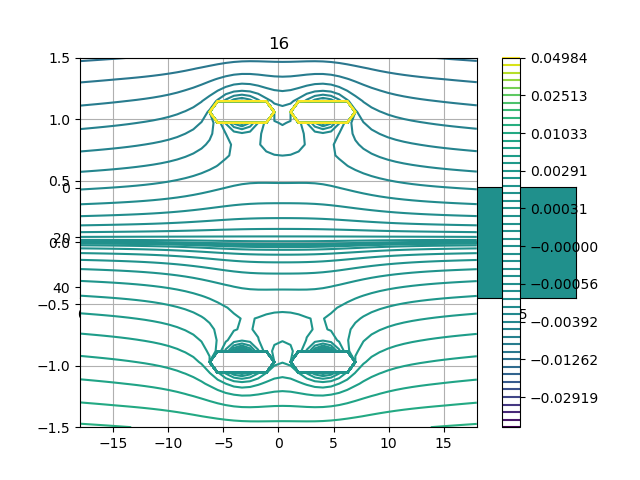

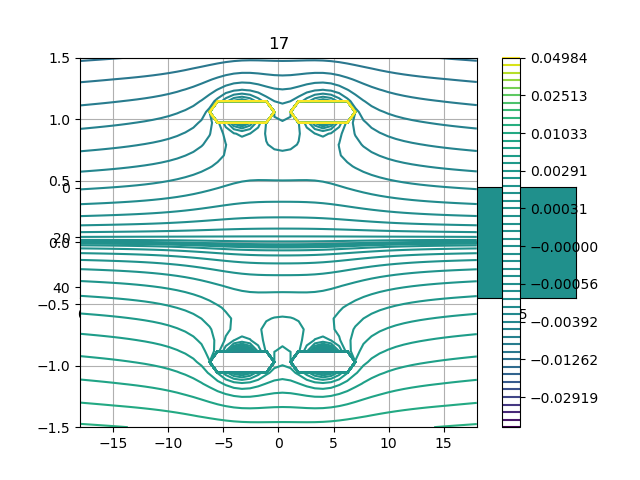

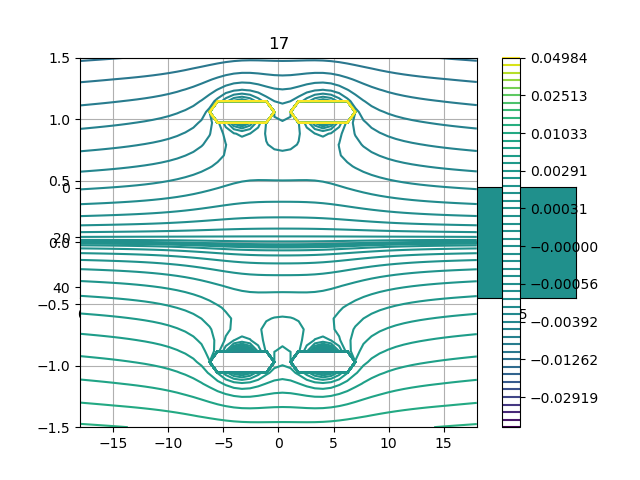

In [ ]:
niter = 200
simulation_y = 45
simulation_x = 200

u0 = 4 * np.pi * 10**-7

currenti = np.zeros((simulation_y, simulation_x))
B = np.zeros((simulation_y, simulation_x))

X = np.arange(simulation_x)[na, :] * np.ones((simulation_y, simulation_x))
Y = np.arange(simulation_y)[:, na] * np.ones((simulation_y, simulation_x))

# Initial conditions
currenti[-1, :] = 1200
currenti[-1, :int(simulation_x / 4)] += 5000 * np.linspace(1, 0, int(simulation_x / 4))
currenti[-1, -int(simulation_x / 4):] += 5000 * np.linspace(0, 1, int(simulation_x / 4))
currenti[0, :] = -1200
currenti[0, :int(simulation_x / 4)] += -5000 * np.linspace(1, 0, int(simulation_x / 4))
currenti[0, -int(simulation_x / 4):] += -5000 * np.linspace(0, 1, int(simulation_x / 4))
# =============================================================================
# beam_current = ((((simulation_x / 60) - np.minimum(simulation_x / 60, np.abs(X - (15 * simulation_x / 31)))) * \
#                ((simulation_y / 90) - np.minimum(simulation_y / 90, np.abs(Y - (simulation_y / 4)))))) - \
#                ((((simulation_x / 60) - np.minimum(simulation_x / 60, np.abs(X - (15 * simulation_x / 31)))) * \
#                ((simulation_y / 90) - np.minimum(simulation_y / 90, np.abs(Y - (3 * simulation_y / 4)))))) + \
#                ((((simulation_x / 60) - np.minimum(simulation_x / 60, np.abs(X - (16 * simulation_x / 31)))) * \
#                ((simulation_y / 90) - np.minimum(simulation_y / 90, np.abs(Y - (simulation_y / 4)))))) - \
#                ((((simulation_x / 60) - np.minimum(simulation_x / 60, np.abs(X - (16 * simulation_x / 31)))) * \
#                ((simulation_y / 90) - np.minimum(simulation_y / 90, np.abs(Y - (3 * simulation_y / 4))))))
# =============================================================================
# Derek's coil
beam_current = ((((simulation_x / 60) - np.minimum(simulation_x / 60, np.abs(X - (14.7 * simulation_x / 31)))) * \
               ((simulation_y / 90) - np.minimum(simulation_y / 90, np.abs(Y - (simulation_y / 4)))))) - \
               ((((simulation_x / 60) - np.minimum(simulation_x / 60, np.abs(X - (14.7 * simulation_x / 31)))) * \
               ((simulation_y / 90) - np.minimum(simulation_y / 90, np.abs(Y - (3 * simulation_y / 4)))))) + \
               ((((simulation_x / 60) - np.minimum(simulation_x / 60, np.abs(X - (16.3 * simulation_x / 31)))) * \
               ((simulation_y / 90) - np.minimum(simulation_y / 90, np.abs(Y - (simulation_y / 4)))))) - \
               ((((simulation_x / 60) - np.minimum(simulation_x / 60, np.abs(X - (16.3 * simulation_x / 31)))) * \
               ((simulation_y / 90) - np.minimum(simulation_y / 90, np.abs(Y - (3 * simulation_y / 4))))))
    
beam_current = beam_current / beam_current.max()
f, ax = plt.subplots()
ax.imshow(beam_current)
plt.show()

current = currenti * 10000
levels = np.logspace(np.log(0.001), np.log(50), 25)
levels = np.hstack((-levels[::-1], levels))


# Iterate
f = plt.figure(1)
ax = f.add_subplot(111)
ax.set_xlabel('z [cm]')
ax.set_ylabel('r [cm]')
for i in range(niter):

    # Calculate B
    axs = X[np.abs(current) > 0].astype(int)
    ays = Y[np.abs(current) > 0].astype(int)
    adxs = np.subtract.outer(X, axs) * 4 / 100
    adys = np.subtract.outer(Y, ays) * 4 / 100
    ads = np.maximum(1e-6, np.sqrt(adxs**2 + adys**2))
    
    B = -u0 * np.sum(current[ays, axs][na, na, :] / ads, axis=2) / 4 / np.pi
# =============================================================================
#     Bx = -u0 * np.sum(current[ays, axs][na, na, :] * adys / ads**2, axis=2) / 4 / np.pi
#     By = u0 * np.sum(current[ays, axs][na, na, :] * adxs / ads**2, axis=2) / 4 / np.pi
#     # B = np.sqrt(Bx**2 + By**2)
# =============================================================================
    

# =============================================================================
#     cont = ax.contourf(current, 50)
# =============================================================================
    ax.clear()
# =============================================================================
#     cont = ax.contour(np.linspace(-120, 120, 50),
#                       np.linspace(-35, 35, 35),
#                       B[5:40, 75:125],
#                       levels=np.linspace(-0.368, 0.368, 50)**3)
# # =============================================================================
# #                       levels=levels**3)
# # =============================================================================
# =============================================================================
    # Derek's coil
    cont = ax.contour(np.linspace(-18, 18, 50),
                      np.linspace(-1.5, 1.5, 35),
                      B[5:40, 75:125],
                      levels=np.linspace(-0.368, 0.368, 50)**3)
    ax.grid(True)
    ax.set_title(i)
    if i == 0: plt.colorbar(cont)
    plt.show(block=False)
    if i == 0: input('Begin?')
    plt.pause(0.01)
# =============================================================================
#     if i < niter - 1: plt.close()
# =============================================================================
    
    current = currenti + (np.minimum(100, i) * beam_current * 70)
    if i > 100:
        current = current + (currenti * (i - 100) * 0.04)
        
    
input() 
    